In [ ]:
#libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Embedding

In [ ]:
#setting parameters
number_of_words = 25000
max_len = 120

In [ ]:
#downloading the data
(X_train, y_train), (X_test,y_test) = imdb.load_data(num_words=number_of_words)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
#pre processing the data
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_len)

X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_len)

In [ ]:
#model building
model = Sequential()
model.add(Embedding(input_dim=number_of_words, output_dim=128, input_shape=(X_train.shape[1],)))
model.add(LSTM(units=512, activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#sumarising the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 128)          3200000   
_________________________________________________________________
lstm (LSTM)                  (None, 512)               1312768   
_________________________________________________________________
dense (Dense)                (None, 1)                 513       
Total params: 4,513,281
Trainable params: 4,513,281
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
model.fit(X_train, y_train, validation_split=0.25, epochs=5, batch_size=64)

Epoch 1/5
293/293 [==============================] - 24s 54ms/step - loss: 0.6373 - accuracy: 0.6300 - val_loss: 0.3835 - val_accuracy: 0.8397
Epoch 2/5
293/293 [==============================] - 15s 52ms/step - loss: 0.2991 - accuracy: 0.8768 - val_loss: 0.3856 - val_accuracy: 0.8266
Epoch 3/5
293/293 [==============================] - 15s 52ms/step - loss: 0.1653 - accuracy: 0.9418 - val_loss: 0.4240 - val_accuracy: 0.8462
Epoch 4/5
293/293 [==============================] - 15s 52ms/step - loss: 0.0756 - accuracy: 0.9739 - val_loss: 0.5530 - val_accuracy: 0.8136
Epoch 5/5
293/293 [==============================] - 15s 51ms/step - loss: 0.0529 - accuracy: 0.9834 - val_loss: 0.6224 - val_accuracy: 0.8296


Text(0.5, 1.0, 'Training-Validation Accuracy')

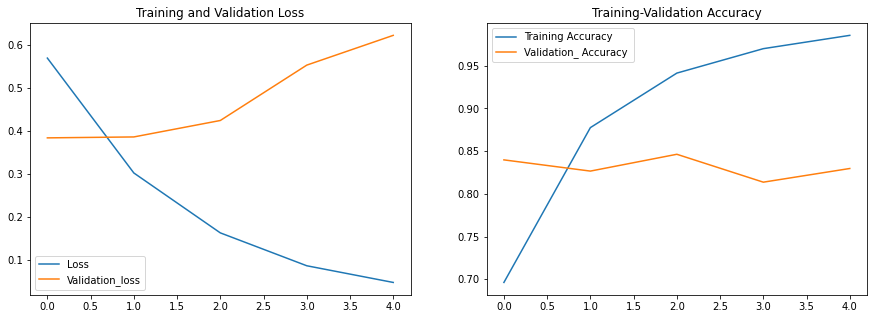

In [ ]:
 #saving the losses
loss = pd.DataFrame(model.history.history)
 
 #plotting the loss and accuracy
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(1,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")